In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install numpy


End date: Sat Jun 04 2022 21:23:08 GMT       
Start data: Thu May 26 2022 16:14:15 GMT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import random
import nltk

In [3]:
# Will read in as a dict
with open('reddit_ni_data.json') as outfile:
    reddit_ni_data = json.load(outfile)

type(reddit_ni_data) # Checking type

dict

In [4]:
reddit_ni_data['post_author']

{'0': 'Ketomatic',
 '1': 'admiral-crusoe',
 '2': 'Bwwaaap',
 '3': 'ooo000oooffs',
 '4': 'JokerTurnip',
 '5': 'mugzhawaii',
 '6': 'vague_intentionally_',
 '7': 'Theyoungwolf43',
 '8': 'SodaBreid',
 '9': 'Lit-Up',
 '10': 'Seamus_Hean3y',
 '11': 'CaptianSpice',
 '12': 'staghallows',
 '13': 'CAPTAIN_DOODLEFLUFF',
 '14': 'KevinBaconsAnOKActor',
 '15': 'lisaslover',
 '16': 'DoireK',
 '17': 'manicjonathan',
 '18': 'Ophidian69',
 '19': 'butterbaps',
 '20': 'DropkickMorgan',
 '21': 'karma-enigma',
 '22': 'JJD14',
 '23': 'Tonymac81',
 '24': 'Appropriate_Sea_489',
 '25': 'Negative-Message-447',
 '26': 'j_m123',
 '27': 'HornsDino',
 '28': 'Cheapskate2020',
 '29': 'n365n366',
 '30': 'zipmcjingles',
 '31': 'Lopsided-Meet8247',
 '32': 'deadonsoitis',
 '33': 'Zatoichi80',
 '34': '_rwzfs',
 '35': 'Boulder1983',
 '36': 'kamizide',
 '37': 'nikadett',
 '38': '_Land_Rover_Series_3',
 '39': 'Intelligent_Put_3973',
 '40': 'PrettyBeanEyes',
 '41': 'younggazza',
 '42': 'Rainbowseeker2020',
 '43': 'ChiefCokkaho

In [5]:
# Get the keys of the dict
keys = reddit_ni_data.keys() 
print(keys)

dict_keys(['created', 'downs', 'post_author', 'post_content', 'post_title', 'score', 'subreddit', 'ups', 'upvote_ratio', 'url'])


I want to get a list of the individual authors

In [6]:
unique_authors = set(reddit_ni_data['post_author'].values())
len(unique_authors)

372

In [7]:
# Convert set to df
unique_authors_df = pd.DataFrame(unique_authors)
type(unique_authors_df)

pandas.core.frame.DataFrame

Since every post will need a title, we can see how many posts we have but look at the number of titles

In [8]:
titles = set(reddit_ni_data['post_title'].values())
len(titles)

496

In [9]:
titles

{'"I\'ll never see it in my lifetine".',
 '"The Irish King Asked to Join The Union"',
 '"The year is 2022… and a BBC presenter and someone from the British Army are explaining why “micks” actually isn’t an offensive term for Irish people… 🙄🤦\u200d♂️"',
 '"you know Jesus loves you". As a foreigner in NI it was the most awkward moment in my life!',
 '1994 Chinook crash',
 '2 Tickets, The National, next Tuesday in the Botanical, Belfast.. €70 the pair',
 '2 x tickets for the Script in 3 Arena, Dublin on 14th June',
 '4 Day Bender....',
 '4 double yolkers in a row!',
 '40 minutes of adverts in the Odyssey cinema before Top Gun',
 '42.7% gas price rise',
 '4DX Cineworld, worth the extra money?',
 'A Huge Shock Visiting the Falls Road: So Much That Unites Us!',
 'A house in Derry is one of the oldest sites in Ireland.',
 'A huge Rhino attacks and tipples a bonfire with its intense strength. 2018',
 'A woman can have a penis',
 'AI generated images of an Irish Nationalist',
 'AI generated ima

So we have 367 individual authors who have written 499 posts. 

I would like to know, first off, who has created the most posts in my dataset

In [10]:
author_list = list(unique_authors)

from collections import Counter, defaultdict
counts = Counter(author_list)
# counts.most_common

In [11]:
post_df = pd.DataFrame.from_dict(reddit_ni_data)
post_df.head(10)

,created,downs,post_author,post_content,post_title,score,subreddit,ups,upvote_ratio,url
0,1.654378e+09,0.0,Ketomatic,* Doxxing is against the reddit TOS ([source](...,No doxxing. No witchunts.,37.0,northernireland,37.0,0.78,https://www.reddit.com/r/northernireland/comme...
1,1.654535e+09,0.0,admiral-crusoe,,How has Barry McElduff been installed as counc...,146.0,northernireland,146.0,0.81,https://i.redd.it/3me9bl4671491.jpg
2,1.654531e+09,0.0,Bwwaaap,,Great to see more action being taken to route ...,115.0,northernireland,115.0,0.97,https://i.redd.it/0r0bwmxfx0491.jpg
3,1.654512e+09,0.0,ooo000oooffs,,Partition in Ireland,243.0,northernireland,243.0,0.97,https://i.imgur.com/D0eUNcV.jpg
4,1.654505e+09,0.0,JokerTurnip,,Jolene Bunting Everybody,252.0,northernireland,252.0,0.82,https://i.redd.it/r6w572j2sy391.jpg
5,1.654532e+09,0.0,mugzhawaii,,AI generated images of an Irish Nationalist,51.0,northernireland,51.0,0.83,https://i.redd.it/6wj2yxehz0491.png
6,1.654536e+09,0.0,vague_intentionally_,,Either Jamie Bryson has access to the @J_Donal...,35.0,northernireland,35.0,0.93,https://twitter.com/east_24/status/15337567830...
7,1.654538e+09,0.0,Theyoungwolf43,,Coming in thick and fast,24.0,northernireland,24.0,0.88,https://i.redd.it/5hgulf9ph1491.jpg
8,1.654533e+09,0.0,SodaBreid,,4 Day Bender....,29.0,northernireland,29.0,0.87,https://i.redd.it/wo3gy58w3x391.jpg
9,1.654500e+09,0.0,Lit-Up,,Guide to having sex with a fleg,166.0,northernireland,166.0,0.93,https://scontent-lhr8-2.xx.fbcdn.net/v/t39.308...


In [12]:
post_df_sorted_by_author = post_df.sort_values(by="post_author", ascending=True)
post_df_sorted_by_author.head()



,created,downs,post_author,post_content,post_title,score,subreddit,ups,upvote_ratio,url
324,1.654021e+09,0.0,0beIix,Anyone want to jump on my bandwagon and call f...,What’s in a name?,0.0,northernireland,0.0,0.31,https://www.reddit.com/r/northernireland/comme...
331,1.653916e+09,0.0,0ore0,"Near the end of the session, the lights went o...",Stormont have been unable to elect a speaker,20.0,northernireland,20.0,0.89,https://www.reddit.com/r/northernireland/comme...
322,1.653901e+09,0.0,10055682,Taking the piss. Scheduled to start at 20:30 a...,40 minutes of adverts in the Odyssey cinema be...,108.0,northernireland,108.0,0.97,https://www.reddit.com/r/northernireland/comme...
87,1.654354e+09,0.0,123finebyme,,Lee Marvin,124.0,northernireland,124.0,0.95,https://i.redd.it/gw27tawf9m391.jpg
453,1.653640e+09,0.0,1seraphius,School of Dentistry is shut for exams.\n\nNo o...,Waited 6 weeks for Dentist to be told it will ...,33.0,northernireland,33.0,0.94,https://www.reddit.com/r/northernireland/comme...


In [13]:
post_df_sorted_by_upvote = post_df.sort_values(by="ups", ascending=False)
post_df_sorted_by_upvote.head()

,created,downs,post_author,post_content,post_title,score,subreddit,ups,upvote_ratio,url
404,1.653669e+09,0.0,daddymo78,,just saying,1211.0,northernireland,1211.0,0.85,https://i.redd.it/toa8dhkpp1291.jpg
106,1.654187e+09,0.0,more-sarahtonin-pls,,Says it all,855.0,northernireland,855.0,0.92,https://i.redd.it/ez7re3ndi8391.jpg
459,1.653571e+09,0.0,C_Mc_Loudmouth,,It does be like...,793.0,northernireland,793.0,0.89,https://i.redd.it/dtd7scdikt191.png
59,1.654375e+09,0.0,CaptianSpice,,Our wee country,669.0,northernireland,669.0,0.93,https://v.redd.it/wh3sh7cm0o391
183,1.654089e+09,0.0,lookinggood44,,listen to the doctor you idiots,649.0,northernireland,649.0,0.87,https://i.redd.it/gg4jwuzpe0391.jpg


In [14]:
capt = post_df.loc[post_df.post_author == "CaptianSpice"]
capt.head(50)

,created,downs,post_author,post_content,post_title,score,subreddit,ups,upvote_ratio,url
11,1.654505e+09,0.0,CaptianSpice,,Boris Johnson vote of confidence to happen today,81.0,northernireland,81.0,0.94,https://www.bbc.co.uk/news/live/uk-politics-60...
59,1.654375e+09,0.0,CaptianSpice,,Our wee country,669.0,northernireland,669.0,0.93,https://v.redd.it/wh3sh7cm0o391
61,1.654423e+09,0.0,CaptianSpice,,Barry McElduff elected as Chair of Fermanagh a...,34.0,northernireland,34.0,0.65,https://i.redd.it/u2ds8cskzr391.jpg
83,1.654380e+09,0.0,CaptianSpice,,"""The Irish King Asked to Join The Union""",40.0,northernireland,40.0,0.83,https://i.redd.it/fp5jeny1ho391.jpg
86,1.654408e+09,0.0,CaptianSpice,,Darren Grimes: There’s nothing jingoistic abou...,7.0,northernireland,7.0,0.60,https://mobile.twitter.com/darrengrimes_/statu...
99,1.654452e+09,0.0,CaptianSpice,,Lyra McKee movie set to be released with ticke...,0.0,northernireland,0.0,0.44,https://www.sheffdocfest.com/film/lyra
117,1.654271e+09,0.0,CaptianSpice,,"Sammy Wilson: Our inept Finance Minister, who ...",4.0,northernireland,4.0,0.63,https://mobile.twitter.com/eastantrimmp/status...
137,1.654174e+09,0.0,CaptianSpice,,Michelle O’Neill: I have written to @RoyalFami...,230.0,northernireland,230.0,0.95,https://mobile.twitter.com/moneillsf/status/15...
148,1.654239e+09,0.0,CaptianSpice,,Consumer recession becoming more likely as NI ...,3.0,northernireland,3.0,0.81,https://m.belfasttelegraph.co.uk/business/nort...
205,1.654100e+09,0.0,CaptianSpice,,UK best prepared for winter in terms of natura...,85.0,northernireland,85.0,0.94,https://i.redd.it/df120hku91391.png


In [90]:
author_title_df = post_df.loc[:,['post_author','post_title']]
author_title_df.size
# I'm not sure yet why this is the size it is
# author_title_df.head(50)

1002

In [16]:
author_title_df['post_author']

0           Ketomatic
1      admiral-crusoe
2             Bwwaaap
3        ooo000oooffs
4         JokerTurnip
            ...      
496        shanemac97
497          deano_ue
498            lijkel
499        aidanbrook
500       UBettaKnow1
Name: post_author, Length: 501, dtype: object

In [17]:
len(author_title_df)

501

In [18]:
unique_authors_df.columns = ["post_author"]
res = pd.merge(author_title_df, unique_authors_df, on='post_author', how="inner")
# author_title_df.columns
# unique_authors_df.columns


In [91]:
res.head()

,post_author,post_title
0,Ketomatic,No doxxing. No witchunts.
1,Ketomatic,Queen’s Jubilee: WATCH – Major blunder as BBC ...
2,admiral-crusoe,How has Barry McElduff been installed as counc...
3,admiral-crusoe,Accurate 😂
4,admiral-crusoe,Is Bullying Epidemic?


In [20]:
# Get the frequency of posters over data period
author_post_freq = res['post_author'].value_counts()
author_post_freq

CaptianSpice          27
Paddy_Irishman_       10
Tornadoninja-6531      6
IrishBogBunny          4
unknown_wizard2183     4
                      ..
Time-Review8493        1
The_Evil-Twin          1
phyrexiansphere        1
Rainbowseeker2020      1
cbaotl                 1
Name: post_author, Length: 372, dtype: int64

The top three posters over the dates I have data for are `CaptianSpice`, `Paddy_Irishman_` and `Tornadoninja-6531`.      

First, we will look at `CaptianSpice`

In [89]:
# Gather the index values of the posts by CaptainSpice
CaptianSpice_post_index = post_df.index[post_df['post_author'] == 'CaptianSpice'].tolist()

type(CaptianSpice_post_index)
len(CaptianSpice_post_index)


27

In [93]:
CaptianSpice_title_holder = []
for x in range(len(CaptianSpice_post_index)):
    capt_res = post_df['post_title'].iloc[int(CaptianSpice_post_index[x])]
    CaptianSpice_title_holder.append(capt_res)

In [94]:
# CaptianSpice_title_holder

In [95]:
CaptianSpice_title_word_freq = Counter(CaptianSpice_title_holder)
# CaptianSpice_title_word_freq

From the above, I need to split each sentence into workds

In [96]:
CaptianSpice_word_bag = ' '.join(CaptianSpice_title_holder).split()
# CaptianSpice_word_bag

In [97]:
CaptianSpice_title_word_freq = Counter(CaptianSpice_word_bag)
# CaptianSpice_title_word_freq.values()

Trying a different apprach to getting my sentences into words

In [98]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Seán\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
# word_tokens = word_tokenize(CaptianSpice_title_holder)

Nope. Tokenizer didn't work. Now I will try and remove the `stopwords` using a different method

In [100]:
CaptianSpice_word_bag_filtered = []

for w in CaptianSpice_word_bag:
    if w not in stop_words:
        CaptianSpice_word_bag_filtered.append(w)
len(CaptianSpice_word_bag_filtered)

272

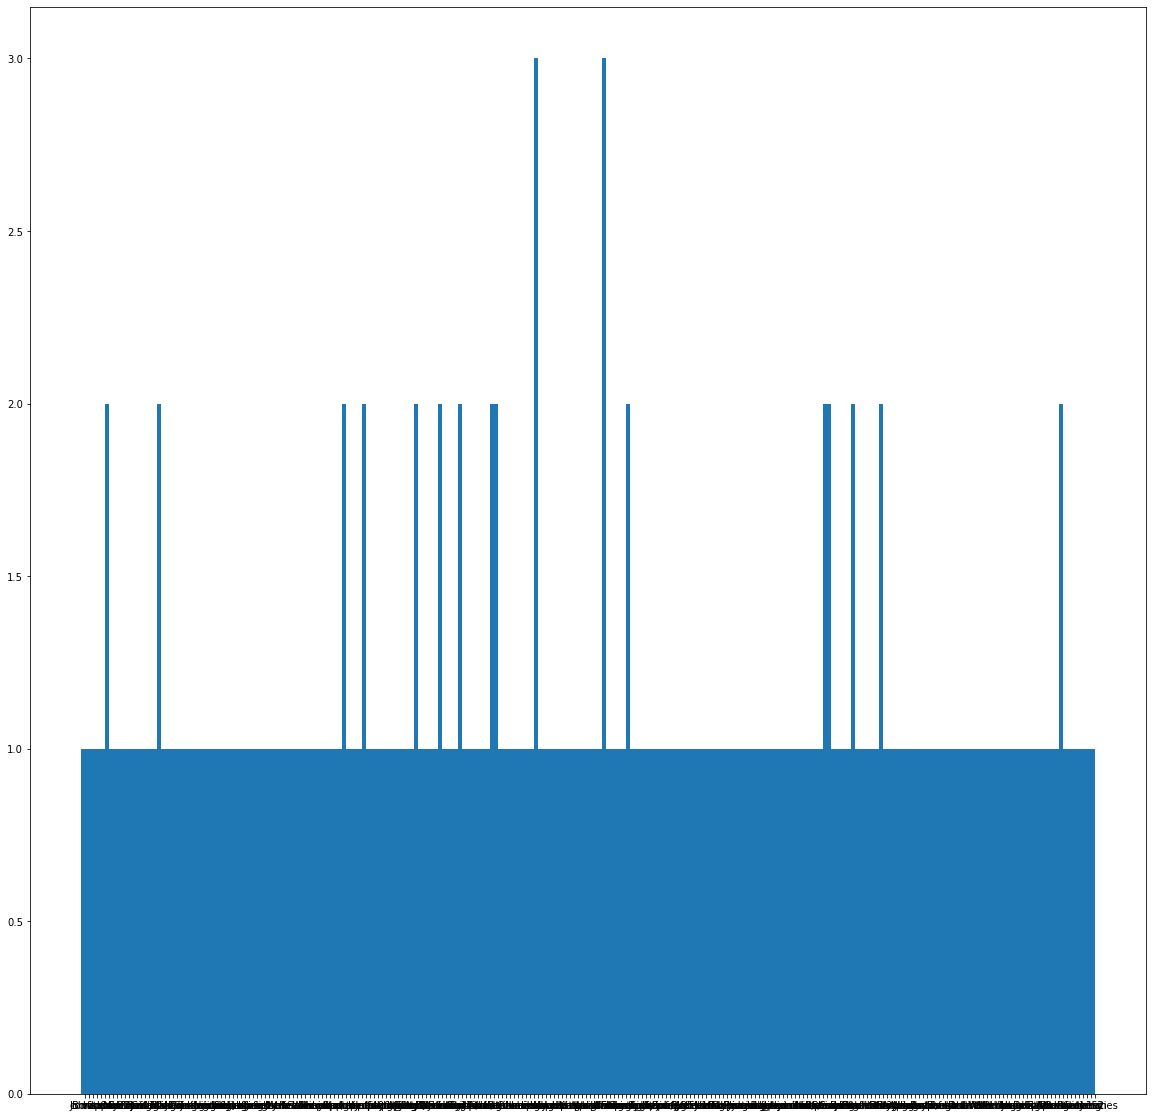

In [101]:
cs_counted_words = Counter(CaptianSpice_word_bag_filtered)

labels, values = zip(*cs_counted_words.items())
indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)

plt.show()

In [102]:
cs_counted_words.values()

dict_values([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
meh = []
for x in range(len(cs_counted_words.values())):
    if cs_counted_words.values > 1:
        print(cs_counted_words.items(x))

Now I will try and look at the post content for the authors

In [105]:
# CaptianSpice post content
author_content_df = post_df.loc[:,['post_author','post_content']]
author_content_df

,post_author,post_content
0,Ketomatic,* Doxxing is against the reddit TOS ([source](...
1,admiral-crusoe,
2,Bwwaaap,
3,ooo000oooffs,
4,JokerTurnip,
...,...,...
496,shanemac97,Does anyone know if the Randox certifly app is...
497,deano_ue,So what’s happening next Friday is it just sim...
498,lijkel,
499,aidanbrook,Coming over to NI for the summer and was hopin...


We can see that not every post contains content in the post body

In [107]:
author_content_df.head()

,post_author,post_content
0,Ketomatic,* Doxxing is against the reddit TOS ([source](...
1,admiral-crusoe,
2,Bwwaaap,
3,ooo000oooffs,
4,JokerTurnip,


In [109]:
# Try and get the post contents for CaptianSpice
# We already have the post index for the Captian - # Gather the index values of the posts by CaptainSpice -- CaptianSpice_post_index
CaptianSpice_content_holder = []
for y in range(len(CaptianSpice_post_index)):
    CaptianSpice_post_content_df = post_df['post_content'].iloc[int(CaptianSpice_post_index[y])]
    CaptianSpice_content_holder.append(CaptianSpice_post_content_df)
CaptianSpice_content_holder

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '\n\n[View Poll](https://www.reddit.com/poll/v3810o)',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 "Given a second attempt to block the speaker, what's everyone's thoughts?\n\n[View Poll](https://www.reddit.com/poll/v11vxx)",
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [110]:
len(CaptianSpice_title_holder)

27

CaptianSpice has, essentially, posted very little content. Of the 27 posts they have made, only two seem to contain any content in the body of the post, and those tow seem to be related to polls. 

It may be interesting, for the moment, to focus on `CaptianSpice`.

In [ ]:
"""
# random.shuffle(CaptianSpice_title_holder)

# from nltk.corpus import stopwords
# nltk.download('stopwords')

# stop_words = list(stopwords.words('english'))
# stop_words

# Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href"])
textt = " ".join(review for review in CaptianSpice_title_holder)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
"""

'# Create stopword list:\nstopwords = set(stop_words)\nstopwords.update(["br", "href"])\ntextt = " ".join(review for review in CaptianSpice_title_holder)\nwordcloud = WordCloud(stopwords=stopwords).generate(textt)'